<a href="https://colab.research.google.com/github/amentetteh/AwesomeBooks/blob/main/Premier_modeleDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importation des librairies
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers


In [ ]:
# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Toutees bases
#https://keras.io/api/datasets/

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
np.min(X_train)
np.max(X_train)

255

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

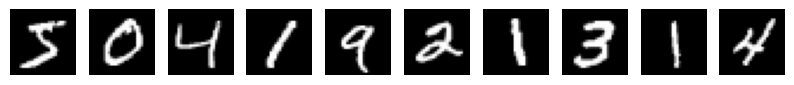

In [ ]:
import matplotlib.pyplot as plt
# Afficher 10 images du dataset
# Crée une nouvelle figure de taille 10x1 pouces
plt.figure(figsize=(10, 1))

# Boucle sur les 10 premières images de X_train
for i in range(10):
    # Ajoute un sous-plot dans une grille de 1 ligne par 10 colonnes
    plt.subplot(1, 10, i+1)
    # Affiche l'image i de X_train en niveaux de gris
    plt.imshow(X_train[i], cmap='gray')
    # Désactive les axes pour une visualisation plus propre
    plt.axis('off')

# Affiche la figure contenant les 10 images
plt.show()

In [ ]:
# Normalisation des données
# Les valeurs de pixels dans les images MNIST vont de 0 à 255.
# - 0 représente le noir complet
# - 255 représente le blanc complet
# Nous divisons ces valeurs par 255 pour les ramener dans la plage [0, 1].
# Cela améliore la stabilité numérique et accélère la convergence du modèle d'apprentissage.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical
# Les étiquettes sont converties en vecteurs binaires.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Construction du modèle de réseau de neurones
model = models.Sequential()

# Aplatissement des images 28x28 en un vecteur de 784 éléments
# Le modèle de réseau de neurones denses nécessite un vecteur d'entrée 1D,
# donc nous devons aplatir les images 2D en un vecteur 1D.
model.add(layers.Flatten(input_shape=(28, 28)))  # Aplatissement des images 28x28 en un vecteur de 784 éléments
model.add(layers.Dense(128, activation='relu'))  # Première couche dense avec 128 neurones et activation ReLU
model.add(layers.Dense(64, activation='relu'))  # Deuxième couche dense avec 64 neurones et activation ReLU
model.add(layers.Dense(10, activation='softmax'))  # Couche de sortie avec 10 neurones (un pour chaque chiffre) et activation softmax



In [ ]:
model.summary()
#

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilation du modèle
# Nous utilisons 'adam' comme optimiseur car il est efficace et largement utilisé.
# 'categorical_crossentropy' est utilisé comme fonction de perte car nous avons des étiquettes catégorielles.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# Entraînement du modèle
# Nous entraînons le modèle sur les données d'entraînement (X_train, y_train) et validons sur les données de test (X_test, y_test).
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2701 - accuracy: 0.9212 - val_loss: 0.1421 - val_accuracy: 0.9568
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1146 - accuracy: 0.9645 - val_loss: 0.1185 - val_accuracy: 0.9651
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0780 - accuracy: 0.9763 - val_loss: 0.1020 - val_accuracy: 0.9694
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0588 - accuracy: 0.9809 - val_loss: 0.0953 - val_accuracy: 0.9716
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0451 - accuracy: 0.9851 - val_loss: 0.0941 - val_accuracy: 0.9730
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.1119 - val_accuracy

In [ ]:
# Évaluation du modèle
# Nous évaluons les performances du modèle sur les données de test.
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.1161 - accuracy: 0.9796 - 757ms/epoch - 2ms/step

Test accuracy: 0.9796000123023987


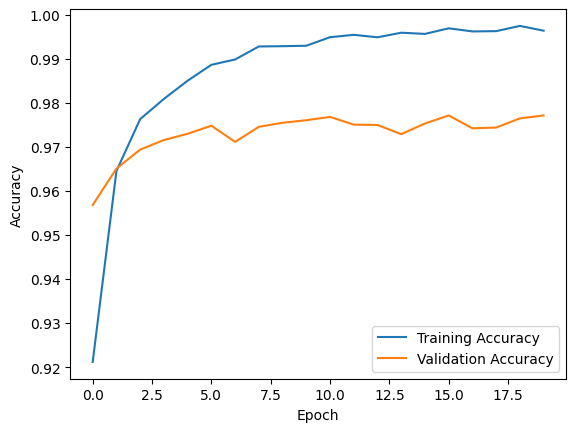

In [ ]:
# Visualisation des performances de l'entraînement
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

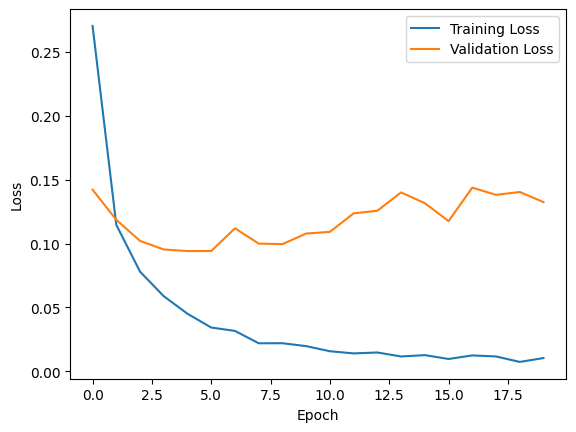

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Prédiction sur une nouvelle base de données (exemple avec les données de test)
predictions = model.predict(X_test[:10])

1/1 [==============================] - 0s 138ms/step


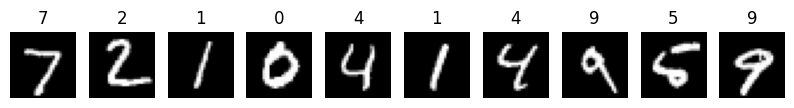

In [ ]:
# Affichage des prédictions pour les 10 premières images du dataset de test
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()

In [ ]:
# Matrice de confusion

In [ ]:
import requests
import pandas as pd

# Base URL without the parameter
base_url = 'https://resultats.gouv.tg/api/examens/bepc/'

# List to store the extracted data
data = []

# Function to scrape a given page
def scrape_page(url):
    # Send a GET request to fetch the page content
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON content
        json_data = response.json()

        # Assuming json_data is a list of dictionaries
        for item in json_data:
            item['URL'] = url  # Add the URL to the item for reference
            data.append(item)
    else:
        print(f"Failed to retrieve {url}, status code: {response.status_code}")

# Loop through each parameter to scrape the corresponding pages
for param in range(501721,502170):
    full_url = base_url + str(param)
    #print(f"Scraping {full_url}")
    scrape_page(full_url)

# Create a pandas DataFrame with the collected data
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('resultat_bepc_2024_apeyeme.xlsx', index=False)

print("Data has been saved to 'resultat_bepc_2024_apeyeme.xlsx'")

from google.colab import files
files.download('resultat_bepc_2024_apeyeme.xlsx')

In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel('resultat_bepc_2024_apeyeme.xlsx')

Saving resultat_bepc_2024_apeyeme.xlsx to resultat_bepc_2024_apeyeme (2).xlsx


In [6]:
# Afficher les premières lignes du DataFrame
print(df.head())

# Afficher des informations générales sur les données
print(df.info())

# Résumé statistique des données
print(df.describe())

   id_fiche_examen  annee      centre_decrit date_naissance decision  \
0           353591   2024  CEG DANYI APEYEME     07/04/2008  Ajourne   
1           351228   2024  CEG DANYI APEYEME     11/07/2009  Ajourne   
2           352206   2024  CEG DANYI APEYEME     31/12/2005  Ajourne   
3           351730   2024  CEG DANYI APEYEME     31/12/2005  Ajourne   
4           355527   2024  CEG DANYI APEYEME     07/10/2007  Ajourne   

             ets_provenance examen  jury      lieu_naiss  mention  moyenne  \
0           CEG DANYI KPETO   BEPC   508  Danyi Gbaladzé  Ajourne      NaN   
1     LYCEE DANYI KUDZRAGAN   BEPC   508      DISP YIKPA  Ajourne      NaN   
2     LYCEE DANYI KUDZRAGAN   BEPC   508    Danyi Kponué  Ajourne      NaN   
3           CEG DANYI KPETO   BEPC   508      Danyi Dafo  Ajourne      NaN   
4  CEG DANYI ATIGBA-N'DIGBE   BEPC   508            LOME  Ajourne      NaN   

                   nom_prenom  num_table          region serie_filiere  \
0                 ABISSI

In [15]:
# Convertir les colonnes de type 'object' en 'string'
df['centre_decrit'] = df['centre_decrit'].astype(str)
df['date_naissance'] = pd.to_datetime(df['date_naissance'], errors='coerce')
df['decision'] = df['decision'].astype(str)
df['ets_provenance'] = df['ets_provenance'].astype(str)
df['examen'] = df['examen'].astype(str)
df['lieu_naiss'] = df['lieu_naiss'].astype(str)
df['mention'] = df['mention'].astype(str)
df['nom_prenom'] = df['nom_prenom'].astype(str)
df['region'] = df['region'].astype(str)
df['serie_filiere'] = df['serie_filiere'].astype(str)
df['session'] = df['session'].astype(str)
df['sexe'] = df['sexe'].astype(str)
df['type_enseignement'] = df['type_enseignement'].astype(str)
df['URL'] = df['URL'].astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_fiche_examen    399 non-null    int64         
 1   annee              399 non-null    int64         
 2   centre_decrit      399 non-null    object        
 3   date_naissance     126 non-null    datetime64[ns]
 4   decision           399 non-null    object        
 5   ets_provenance     399 non-null    object        
 6   examen             399 non-null    object        
 7   jury               399 non-null    int64         
 8   lieu_naiss         399 non-null    object        
 9   mention            399 non-null    object        
 10  moyenne            0 non-null      float64       
 11  nom_prenom         399 non-null    object        
 12  num_table          399 non-null    int64         
 13  region             399 non-null    object        
 14  serie_fili

In [19]:
# Afficher les premières lignes pour vérifier la conversion
print(df.head())
# Vérifier les types de données
print(df.info())

   id_fiche_examen  annee      centre_decrit date_naissance decision  \
0           353591   2024  CEG DANYI APEYEME     2008-07-04  Ajourne   
1           351228   2024  CEG DANYI APEYEME     2009-11-07  Ajourne   
2           352206   2024  CEG DANYI APEYEME            NaT  Ajourne   
3           351730   2024  CEG DANYI APEYEME            NaT  Ajourne   
4           355527   2024  CEG DANYI APEYEME     2007-07-10  Ajourne   

             ets_provenance examen  jury      lieu_naiss  mention  ...  \
0           CEG DANYI KPETO   BEPC   508  Danyi Gbaladzé  Ajourne  ...   
1     LYCEE DANYI KUDZRAGAN   BEPC   508      DISP YIKPA  Ajourne  ...   
2     LYCEE DANYI KUDZRAGAN   BEPC   508    Danyi Kponué  Ajourne  ...   
3           CEG DANYI KPETO   BEPC   508      Danyi Dafo  Ajourne  ...   
4  CEG DANYI ATIGBA-N'DIGBE   BEPC   508            LOME  Ajourne  ...   

                   nom_prenom num_table          region serie_filiere  \
0                 ABISSI Rock    501721  Plateaux

In [20]:
df['decision'].unique()

array(['Ajourne', 'Passable', 'TBien', 'Abien', 'Absent', 'Bien'],
      dtype=object)

In [21]:
# Créer une fonction pour classifier les mentions
def classifier_mention(mention):
    if mention.lower() == 'ajourne':
        return 'échoué'
    else:
        return 'admis'

# Appliquer la fonction à la colonne des mentions
df['statut'] = df['decision'].apply(classifier_mention)


In [22]:
df['statut'].describe()

count        399
unique         2
top       échoué
freq         315
Name: statut, dtype: object

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


statut
échoué    315
admis      84
Name: count, dtype: int64


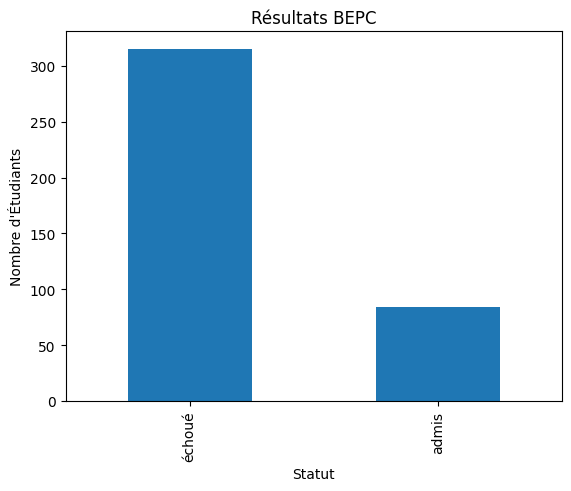

In [25]:
# Compter le nombre d'étudiants admis et échoués
print(df['statut'].value_counts())

# Diagramme à barres des résultats
df['statut'].value_counts().plot(kind='bar')
plt.title('Résultats BEPC')
plt.xlabel('Statut')
plt.ylabel('Nombre d\'Étudiants')
plt.show()


In [26]:
# Compter le nombre total d'étudiants par établissement de provenance
total_par_ets = df['ets_provenance'].value_counts()

# Compter le nombre d'étudiants admis par établissement de provenance
admis_par_ets = df[df['statut'] == 'admis']['ets_provenance'].value_counts()

# Calculer le pourcentage de réussite par établissement de provenance
pourcentage_reussite_par_ets = (admis_par_ets / total_par_ets) * 100

# Remplir les valeurs manquantes avec 0 (si un établissement n'a aucun admis, par exemple)
pourcentage_reussite_par_ets = pourcentage_reussite_par_ets.fillna(0)


In [28]:
print(total_par_ets)

ets_provenance
CEG DANYI ATIGBA-N'DIGBE          91
CEG DANYI APEYEME                 81
CEG DANYI KPETO                   67
LYCEE DANYI KUDZRAGAN             53
COLLEGE SAINT MICHEL              40
CEG DANYI DZOGBEGAN-MEMPEASSEM    37
CEG DANYI AMEGAPE-NYAMEGBE        19
CEG DANYI KETEME                  11
Name: count, dtype: int64


In [29]:
print(admis_par_ets)

ets_provenance
CEG DANYI APEYEME                 27
CEG DANYI ATIGBA-N'DIGBE          14
COLLEGE SAINT MICHEL              11
LYCEE DANYI KUDZRAGAN             10
CEG DANYI DZOGBEGAN-MEMPEASSEM     9
CEG DANYI AMEGAPE-NYAMEGBE         6
CEG DANYI KPETO                    5
CEG DANYI KETEME                   2
Name: count, dtype: int64


In [27]:
print(pourcentage_reussite_par_ets)

ets_provenance
CEG DANYI AMEGAPE-NYAMEGBE        31.578947
CEG DANYI APEYEME                 33.333333
CEG DANYI ATIGBA-N'DIGBE          15.384615
CEG DANYI DZOGBEGAN-MEMPEASSEM    24.324324
CEG DANYI KETEME                  18.181818
CEG DANYI KPETO                    7.462687
COLLEGE SAINT MICHEL              27.500000
LYCEE DANYI KUDZRAGAN             18.867925
Name: count, dtype: float64
